# Convolutional Variational Autoencoder for Anomaly Detection

### Imports

In [1]:
from torchsummary import summary
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os

### Import utility functions

In [2]:
#from helper_train import train_vae, loss_mse
from helper_plotting import plot_generated_images
from helper_datasets import CustomDataset
from helper_utils import load_data
from helper_vaeModel import VAE
from helper_train import Trainer
from helper_featureextractor import FeatureExtractor

### Model Hyperparameters

In [3]:
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#torch.cuda.is_available()
#!python -c "import torch; print(torch.cuda.is_available())"
torch.cuda.empty_cache()
print('Device:', device)
# Hyperparameters
hyperParams = {'LEARNING_RATE': 5e-5,
            'NUM_EPOCHS': 100,
            'DATA_CLASS': "ksdd1-rect",
            'IMAGE_SIZE': [1024,512],
            'VERSION': "kssd_latent_512_v1"}
params = {'batch_size': 12,
         'shuffle' : True,
         'num_workers' : 10}

Device: cuda


### Prepare the paths for loading the images

In [4]:
#DATASET_PATH = r'/home/jovyan/work/Project/USL-AD-EVAL/data/combined/ksdd1-rect/train/good'
#os.listdir(DATASET_PATH)
#train_dataLoader, valid_dataLoader, test_dataLoader = load_data(data_class, size, params)

### Import image using Custom DataLoader 

###  Autoencoder

Let x and z denote the observation and latent variable respectively in the following descriptions.

#### Encoder network
This defines the approximate posterior distribution q(z|x), which takes as input an observation and outputs a set of parameters for specifying the conditional distribution of the latent representation z. In this example, simply model the distribution as a diagonal Gaussian, and the network outputs the mean and log-variance parameters of a factorized Gaussian. Output log-variance instead of the variance directly for numerical stability.

#### Decoder network
This defines the conditional distribution of the observation p(x|z), which takes a latent sample z as input and outputs the parameters for a conditional distribution of the observation. Model the latent distribution prior p(z) as a unit Gaussian.

#### Implementation:
* For variational autoencoders, we need to define the architecture of two parts encoder and decoder but first, we will define the bottleneck layer of architecture

### Building the Encoder

### Summary of Model

In [5]:
model = VAE(latent_dim=512)
model = model.to(device)
#encoded = model.encoding_fn(input_shape)
summary(model=model,
        input_size=(1,1024,512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 8, 1024, 512]              16
            Conv2d-2         [-1, 16, 512, 256]           1,168
       BatchNorm2d-3         [-1, 16, 512, 256]              32
         LeakyReLU-4         [-1, 16, 512, 256]               0
            Conv2d-5          [-1, 8, 512, 256]             136
            Conv2d-6         [-1, 32, 256, 128]           2,336
       BatchNorm2d-7         [-1, 32, 256, 128]              64
         LeakyReLU-8         [-1, 32, 256, 128]               0
            Conv2d-9          [-1, 8, 256, 128]             264
           Conv2d-10          [-1, 64, 128, 64]           4,672
      BatchNorm2d-11          [-1, 64, 128, 64]             128
        LeakyReLU-12          [-1, 64, 128, 64]               0
           Conv2d-13           [-1, 8, 128, 64]             520
           Conv2d-14          [-1, 128,

#### Import some helper function

* The Autoencoder is trained on small parts of images using a dataset, the Adam optimizer, and the mean squared error loss function. 
* Now model is trained by averaging the reconstruction errors for each full image instead of keeping the reconstruction errors for each small part. we're computing the loss for the full image by averaging the reconstruction errors for each small part of the image. This will give a single loss value for each full image, which can be used to update the model's parameters via backpropagation.

### Training 

In [6]:
vae_trainer = Trainer(model, hyperParams=hyperParams, DataLoderParams=params)

loaded 294 images for training
loaded 35 images for validation
loaded 36 images for testing


[1/100] Train-loss: 950226.745 Val-loss: 931814.833
Time elapsed: 0.05 min


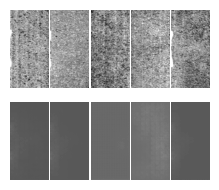

[2/100] Train-loss: 914475.705 Val-loss: 871839.625
[3/100] Train-loss: 864965.805 Val-loss: 805132.896


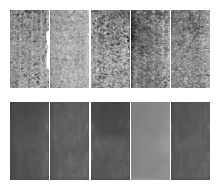

[4/100] Train-loss: 812133.353 Val-loss: 752706.208
[5/100] Train-loss: 779877.532 Val-loss: 707957.833
Time elapsed: 0.29 min


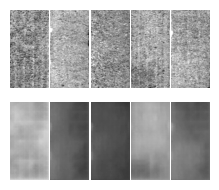

[6/100] Train-loss: 758173.120 Val-loss: 689490.083
[7/100] Train-loss: 733766.412 Val-loss: 654124.292


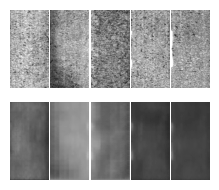

[8/100] Train-loss: 713280.123 Val-loss: 666693.312
[9/100] Train-loss: 695198.047 Val-loss: 637278.833
Time elapsed: 0.52 min


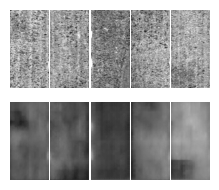

[10/100] Train-loss: 691822.536 Val-loss: 625176.208
[11/100] Train-loss: 678726.968 Val-loss: 612493.896


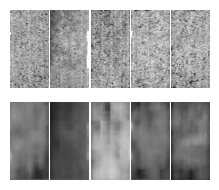

[12/100] Train-loss: 672813.743 Val-loss: 610793.208
[13/100] Train-loss: 665760.774 Val-loss: 606583.146
Time elapsed: 0.75 min


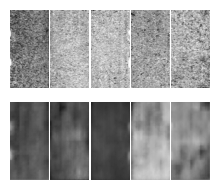

[14/100] Train-loss: 662610.662 Val-loss: 593434.688
[15/100] Train-loss: 655388.860 Val-loss: 592894.969


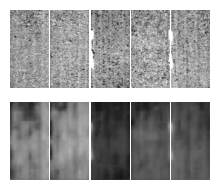

[16/100] Train-loss: 652498.641 Val-loss: 605608.562
[17/100] Train-loss: 643881.501 Val-loss: 598394.594
Time elapsed: 0.98 min


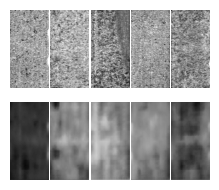

[18/100] Train-loss: 637927.203 Val-loss: 580872.938
[19/100] Train-loss: 643425.123 Val-loss: 576892.958


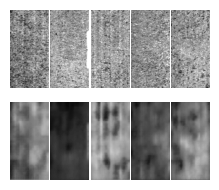

[20/100] Train-loss: 632356.806 Val-loss: 599829.990
[21/100] Train-loss: 625533.318 Val-loss: 584323.792
Time elapsed: 1.21 min


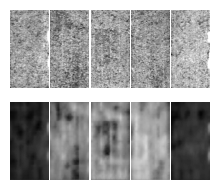

[22/100] Train-loss: 618869.632 Val-loss: 576287.927
[23/100] Train-loss: 616689.498 Val-loss: 576765.240


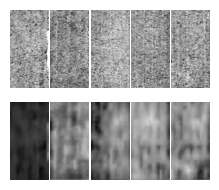

[24/100] Train-loss: 616246.292 Val-loss: 577338.823
[25/100] Train-loss: 612889.682 Val-loss: 571227.000
Time elapsed: 1.45 min


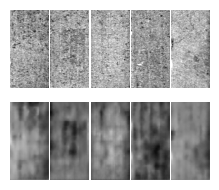

[26/100] Train-loss: 607012.017 Val-loss: 556246.792
[27/100] Train-loss: 604243.093 Val-loss: 606404.438


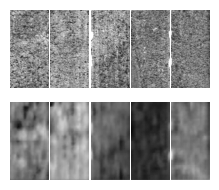

[28/100] Train-loss: 600864.323 Val-loss: 554787.344
[29/100] Train-loss: 601457.142 Val-loss: 546778.427
Time elapsed: 1.69 min


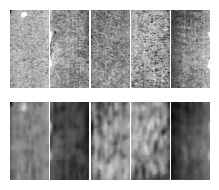

[30/100] Train-loss: 595669.546 Val-loss: 545126.500
[31/100] Train-loss: 598276.100 Val-loss: 547964.698


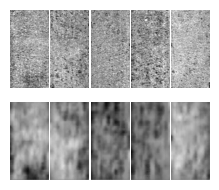

[32/100] Train-loss: 592540.484 Val-loss: 561008.115
[33/100] Train-loss: 584549.667 Val-loss: 543860.958
Time elapsed: 1.92 min


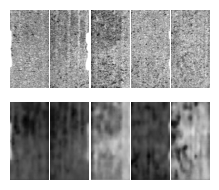

[34/100] Train-loss: 582077.360 Val-loss: 546237.604
[35/100] Train-loss: 577414.297 Val-loss: 535476.615


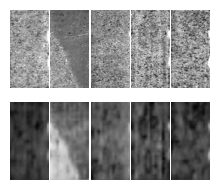

[36/100] Train-loss: 575959.775 Val-loss: 541952.167
[37/100] Train-loss: 572652.873 Val-loss: 557770.062
Time elapsed: 2.16 min


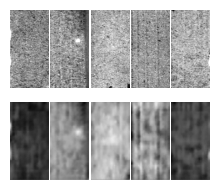

[38/100] Train-loss: 571430.004 Val-loss: 533660.896
[39/100] Train-loss: 567756.990 Val-loss: 538404.125


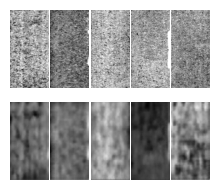

[40/100] Train-loss: 563549.276 Val-loss: 527622.302
[41/100] Train-loss: 567212.285 Val-loss: 526974.281
Time elapsed: 2.39 min


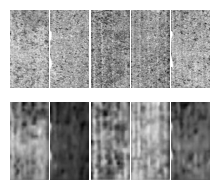

[42/100] Train-loss: 561500.605 Val-loss: 524049.062
[43/100] Train-loss: 561554.914 Val-loss: 535877.969


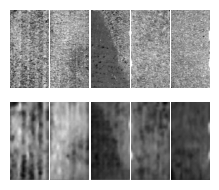

[44/100] Train-loss: 553453.304 Val-loss: 522669.229
[45/100] Train-loss: 558523.996 Val-loss: 519409.479
Time elapsed: 2.63 min


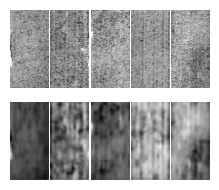

[46/100] Train-loss: 556417.390 Val-loss: 518974.240
[47/100] Train-loss: 549574.807 Val-loss: 523963.531


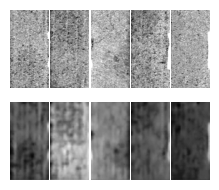

[48/100] Train-loss: 548773.544 Val-loss: 524567.625
[49/100] Train-loss: 547461.730 Val-loss: 522717.438
Time elapsed: 2.87 min


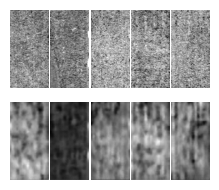

[50/100] Train-loss: 544336.463 Val-loss: 529815.594
[51/100] Train-loss: 544107.746 Val-loss: 512063.250


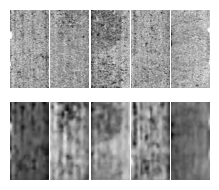

[52/100] Train-loss: 539556.924 Val-loss: 509669.781
[53/100] Train-loss: 536480.634 Val-loss: 511986.031
Time elapsed: 3.10 min


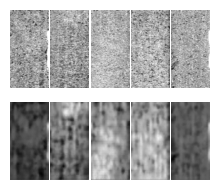

[54/100] Train-loss: 538631.994 Val-loss: 520124.854
[55/100] Train-loss: 529977.906 Val-loss: 505889.667


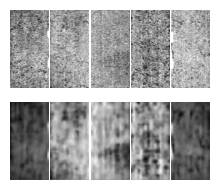

[56/100] Train-loss: 531546.365 Val-loss: 509266.719
[57/100] Train-loss: 533095.194 Val-loss: 500400.000
Time elapsed: 3.34 min


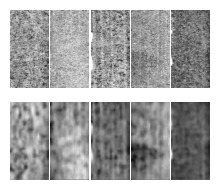

[58/100] Train-loss: 526663.998 Val-loss: 502938.781
[59/100] Train-loss: 527210.421 Val-loss: 532529.875


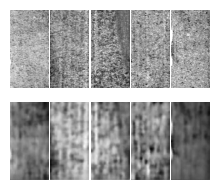

[60/100] Train-loss: 522503.224 Val-loss: 510099.760
[61/100] Train-loss: 520987.714 Val-loss: 490788.427
Time elapsed: 3.57 min


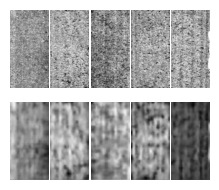

[62/100] Train-loss: 526356.229 Val-loss: 493538.031
[63/100] Train-loss: 519434.893 Val-loss: 496937.458


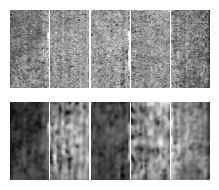

[64/100] Train-loss: 515023.297 Val-loss: 502519.708
[65/100] Train-loss: 515273.614 Val-loss: 484859.760
Time elapsed: 3.81 min


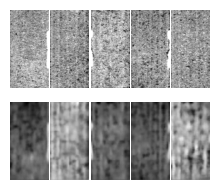

[66/100] Train-loss: 513586.736 Val-loss: 486391.333
[67/100] Train-loss: 509053.020 Val-loss: 480401.198


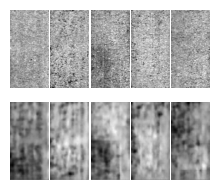

[68/100] Train-loss: 513256.961 Val-loss: 483682.167
[69/100] Train-loss: 505813.100 Val-loss: 477770.198
Time elapsed: 4.04 min


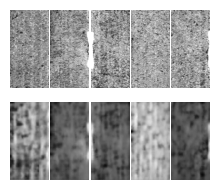

[70/100] Train-loss: 507940.334 Val-loss: 493585.385
[71/100] Train-loss: 504270.354 Val-loss: 492040.583


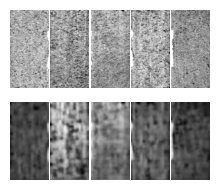

[72/100] Train-loss: 501573.950 Val-loss: 483399.885
[73/100] Train-loss: 499570.496 Val-loss: 472724.250
Time elapsed: 4.28 min


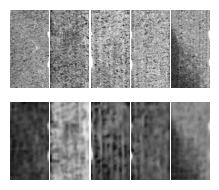

[74/100] Train-loss: 499968.250 Val-loss: 488187.562
[75/100] Train-loss: 499281.472 Val-loss: 488602.969


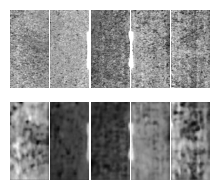

[76/100] Train-loss: 492664.324 Val-loss: 483082.104
[77/100] Train-loss: 489728.999 Val-loss: 474472.969
Time elapsed: 4.52 min


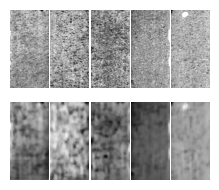

[78/100] Train-loss: 489205.589 Val-loss: 476705.688
[79/100] Train-loss: 489221.411 Val-loss: 475051.677
Epoch 00079: reducing learning rate of group 0 to 5.0000e-07.


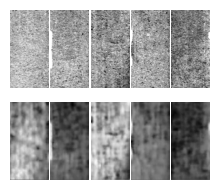

[80/100] Train-loss: 487716.196 Val-loss: 477137.000
[81/100] Train-loss: 487641.585 Val-loss: 461981.385
Time elapsed: 4.75 min


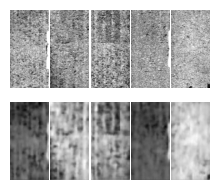

[82/100] Train-loss: 492688.290 Val-loss: 486394.042
[83/100] Train-loss: 487319.698 Val-loss: 472346.479


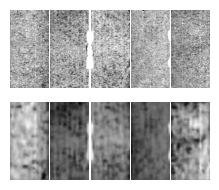

[84/100] Train-loss: 489349.505 Val-loss: 484885.948
[85/100] Train-loss: 486121.704 Val-loss: 466416.646
Time elapsed: 4.99 min


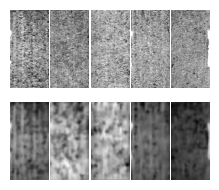

[86/100] Train-loss: 488513.366 Val-loss: 467245.552
[87/100] Train-loss: 489775.927 Val-loss: 490837.198
Epoch 00087: reducing learning rate of group 0 to 5.0000e-09.


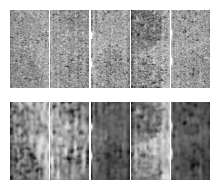

[88/100] Train-loss: 489670.224 Val-loss: 466309.594
[89/100] Train-loss: 484350.117 Val-loss: 486156.219
Time elapsed: 5.23 min


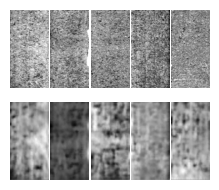

[90/100] Train-loss: 486500.744 Val-loss: 472620.052
[91/100] Train-loss: 487677.819 Val-loss: 475163.688


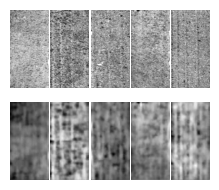

[92/100] Train-loss: 487397.949 Val-loss: 474812.479
[93/100] Train-loss: 490940.234 Val-loss: 480517.281
Time elapsed: 5.46 min


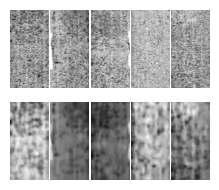

[94/100] Train-loss: 492719.686 Val-loss: 481260.042
[95/100] Train-loss: 488590.669 Val-loss: 471839.990


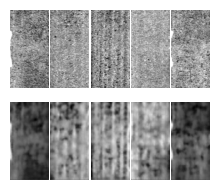

[96/100] Train-loss: 484532.651 Val-loss: 488610.698
[97/100] Train-loss: 484968.670 Val-loss: 465089.896
Time elapsed: 5.70 min


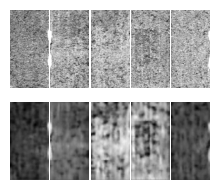

[98/100] Train-loss: 488514.297 Val-loss: 468122.375
[99/100] Train-loss: 487297.760 Val-loss: 464230.062


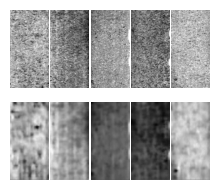

[100/100] Train-loss: 483986.508 Val-loss: 471748.031
Total Training Time: 5.88 min


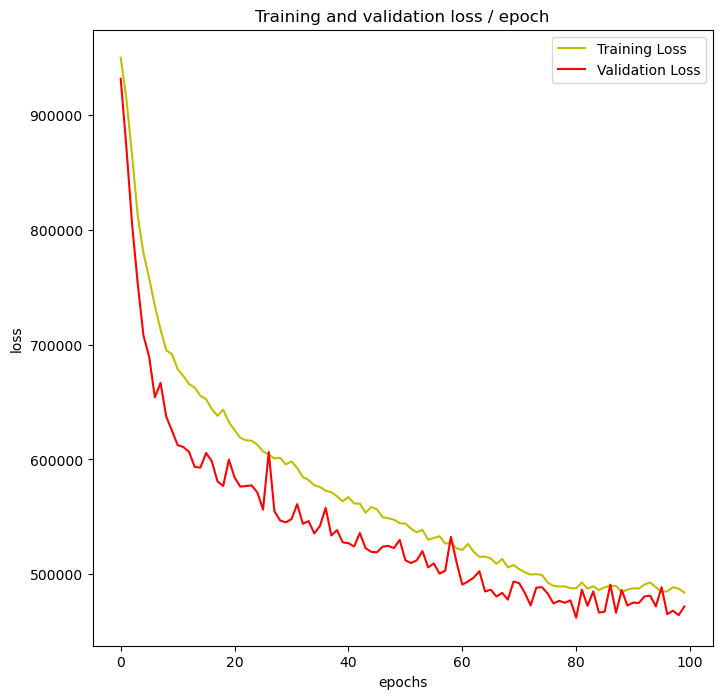

In [7]:
vae_trainer.train()

### Plot a Graph

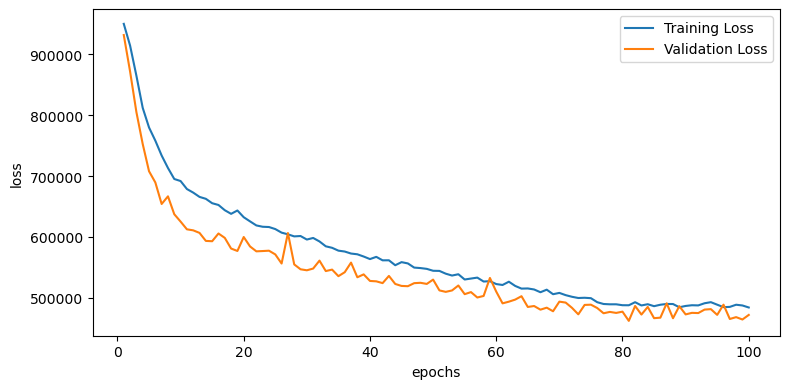

In [8]:
fig = plt.figure(figsize=(8,4))
plt.plot(range(1,len(vae_trainer.train_data['epoch_train_losses'])+1), vae_trainer.train_data['epoch_train_losses'], label='Training Loss')
plt.plot(range(1,len(vae_trainer.train_data['epoch_val_losses'])+1), vae_trainer.train_data['epoch_val_losses'],label='Validation Loss')

plt.xlabel('epochs')
plt.ylabel('loss')
#plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#fig.savefig('loss_plot_v3.png', bbox_inches='tight')

### Save model's trained Weight and bias and load it

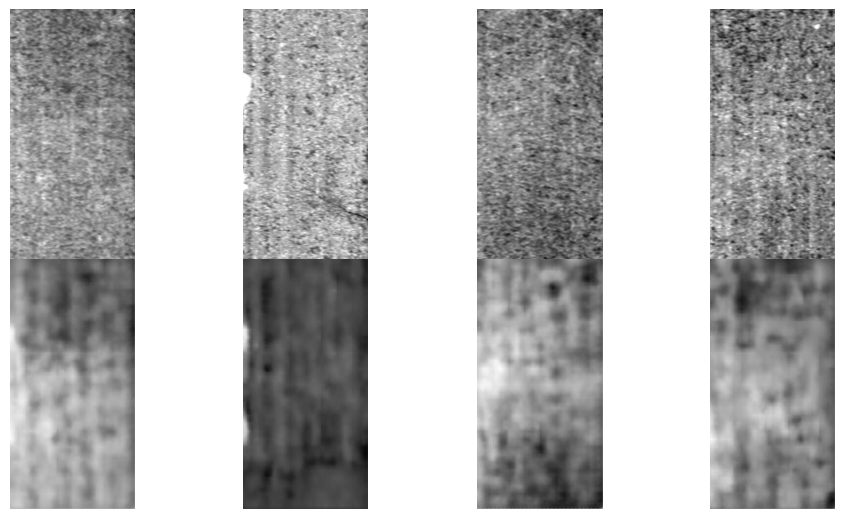

In [9]:
#unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
test_dataLoader = vae_trainer.test_dataLoader
plot_generated_images(data_loader=test_dataLoader,
                      model=model,
                      #unnormalizer=unnormalizer,
                      device=device,
                      n_images=4,
                      modeltype='VAE') 

In [10]:
vae_trainer.compute_train_outputs()

Mean traning recon. error: 562786.25


In [11]:
vae_trainer.compute_test_outputs()

Mean test recon. error anom: 576913.125
Mean test recon. error good: 389517.28125


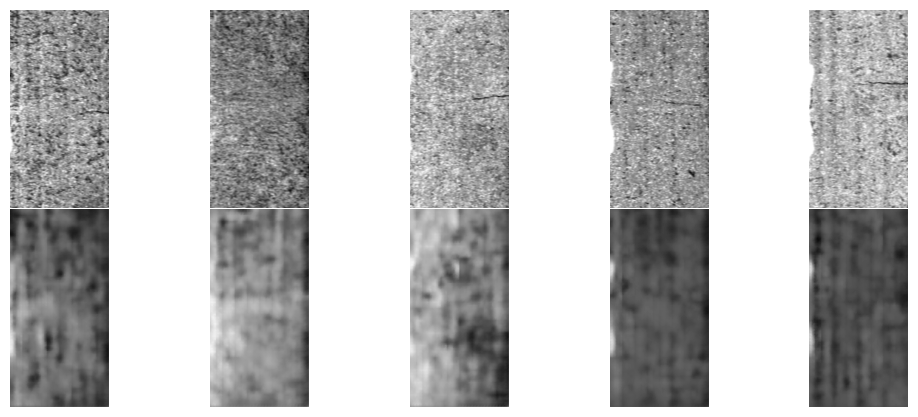

In [12]:
vae_trainer.inspect(mode="test")

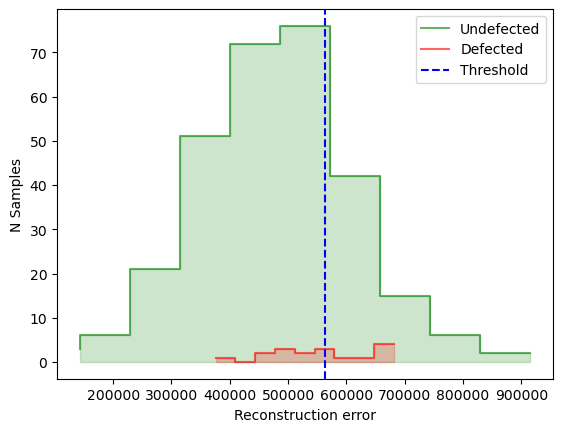

In [13]:
vae_trainer.show_error_distribution()

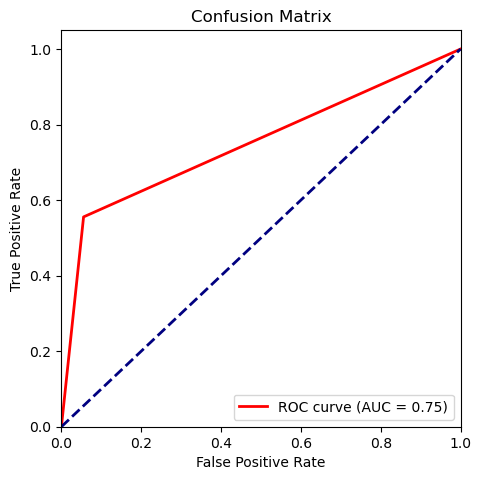

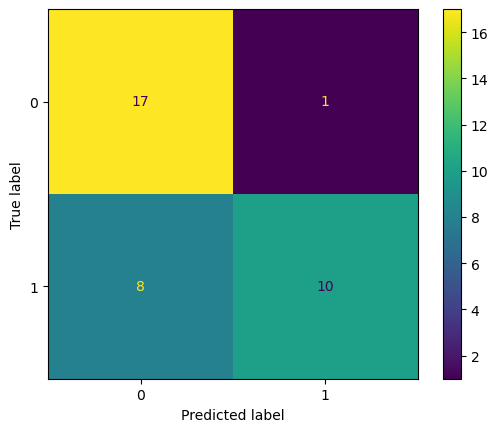

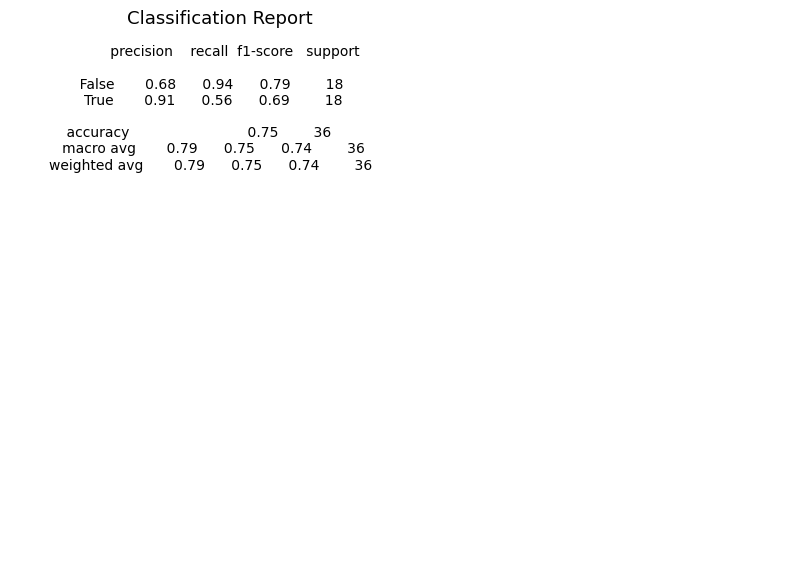

In [14]:
vae_trainer.evaluate_ae()

In [15]:
vae_trainer.save_model()

[t-SNE] Computing 35 nearest neighbors...
[t-SNE] Indexed 36 samples in 0.001s...
[t-SNE] Computed neighbors for 36 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 36 / 36
[t-SNE] Mean sigma: 15.201062
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.846157
[t-SNE] KL divergence after 1000 iterations: 0.323749


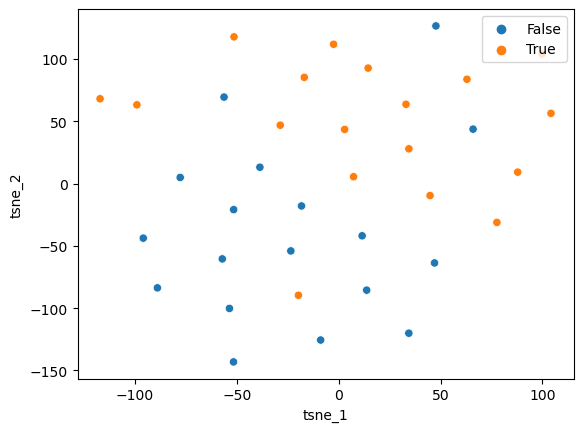

In [16]:
extractor = FeatureExtractor(vae_trainer.model, vae_trainer.train_dataLoader, vae_trainer.test_dataLoader)
extractor.plot_tsne()